<a href="https://colab.research.google.com/github/isdrael4590/DIALUNG/blob/main/Procesamiento_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
#Una forma de cargar imagenes a Google Colab
from IPython.display import Image

I1 = Image("/content/drive/MyDrive/Imagenes/00a85be6-6eb0-421d-8acf-ff2dc0007e8a.jpg")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 #Computer Vision

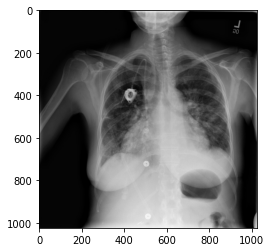

In [23]:
image = cv2.imread("/content/drive/MyDrive/Imagenes/0a9fd225-a33a-47de-849e-156933b21296.jpg") #Leer Imagen
plt.imshow(image) #Se muestra la imagen con matplotlib

This image is: <class 'numpy.ndarray'>
(1024, 1024, 3)
(1024, 1024)


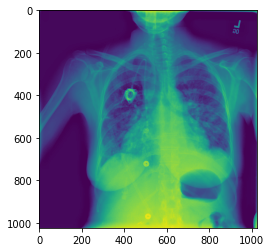

In [27]:
#Hacer una copia de la imagen para no modificar la original
copyImage = np.copy(image)

#Cambiar el color RGB A BGR Y GRIS
copyImage = cv2.cvtColor(copyImage, cv2.COLOR_BGR2GRAY)
print("This image is:", type(copyImage))
print(image.shape)
print(copyImage.shape)
plt.imshow(copyImage)

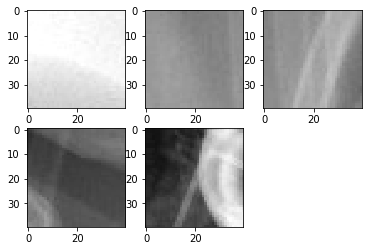

In [32]:
#ExamplePixels relacionados con lo que queremos buscar en la imagen
examplePixels = [[750,800],[370,270],[380,300],[240,310],[400,400]]
examples = []

#Creamos un grid de 9x9 alrededor de cada pixel de prueba y los agregamos a Examples

for pixel in examplePixels:
  example = copyImage[pixel[0]-20:pixel[0]+20, pixel[1]-20:pixel[1]+20]
  examples.append(example)

fig = plt.figure(0, (6,4))

for i, example in enumerate(examples):
  #Dos filas tres columnas, que muestren cada ejemplo
  ax = fig.add_subplot(2,3,i+1)
  #Mostrar imagen con matplotlib
  ax.imshow(example, cmap='gray', interpolation='none', vmin=0, vmax = 200)


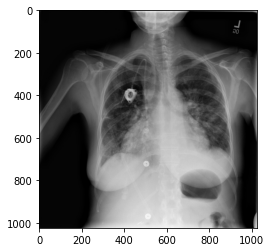

In [63]:
image1 = cv2.imread("/content/drive/MyDrive/Imagenes/0a9fd225-a33a-47de-849e-156933b21296.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1) 

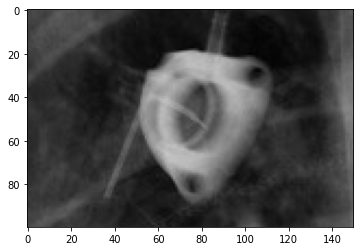

In [66]:
#Seleccionar una zona de la imagen
#Imagen[desdeY:hastaY, desdeX:hastaX]
zona = image1[350:450, 350:500]
plt.imshow(zona, cmap='gray')

**Apliquemos filtros**

Los filtros son matrices NxM que pasan por cada pixel de la imagen, aplican una multiplicación y modifican el valor del pixel

In [41]:
from scipy.signal import convolve2d

In [59]:
def show_differences(kernel): #Creamos una función para pasarle un filtro a la imagen
  convolved = convolve2d(copyImage, kernel)
  fig = plt.figure(figsize=(12,12))
  plt.subplot(121)
  plt.title('Original Image')
  plt.axis('off')
  plt.imshow(copyImage, cmap= 'gray')

  plt.subplot(122)
  plt.title('Convolved Image')
  plt.axis('off')
  plt.imshow(convolved, cmap= 'gray')
  return convolved

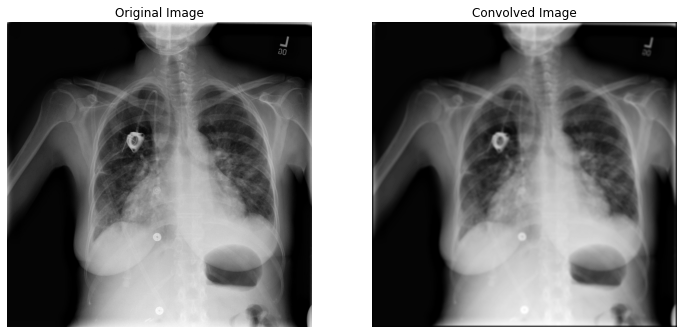

In [60]:
#El filtro es una matriz de pixeles o de colores

#Hacer borrosa una imagen por un factor de 1/128
kernel = (np.ones(9).reshape(3,3))/128

#Hacer borrosa una imagen por un factor de 1/6
kernel1 = np.ones((8,8), np.float32)/64
output = show_differences(kernel1) #Imagen convolucionada borrosa, desenfocar una imagen

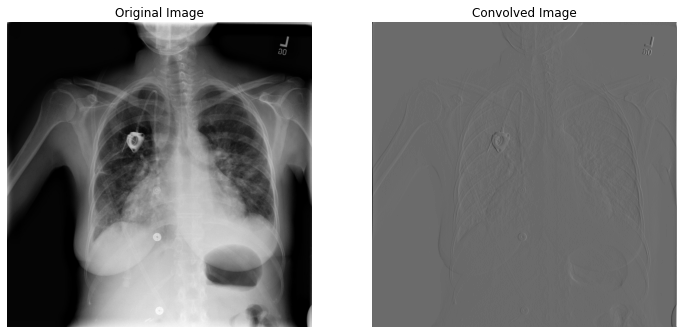

In [61]:
#Filtro para resaltar o detectar líneas verticales
kernel2 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], np.float32) #Lado positivo, lado negativo, la línea del centro se resaltará
dx = show_differences(kernel2)

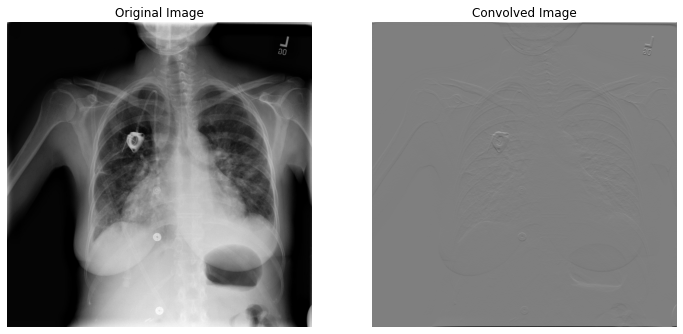

In [62]:
#Filtro para detectar o resaltar líneas horizontales
kernel3 = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], np.float32) #Lado positivo, lado negativo, la línea del centro se resaltará
dy = show_differences(kernel3)